In [69]:
import pandas as pd

In [70]:
df = pd.read_csv("second(560).csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
1,375,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
2,376,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
3,377,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,NaN
4,378,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,555,Female,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia
182,556,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
183,557,Female,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia
184,558,Male,43,Salesperson,6.4,6,45,7,Overweight,130/85,72,6000,Insomnia


In [71]:
df.drop_duplicates(inplace=True)

array([[<Axes: title={'center': 'Person ID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration'}>],
       [<Axes: title={'center': 'Quality of Sleep'}>,
        <Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>],
       [<Axes: title={'center': 'Heart Rate'}>,
        <Axes: title={'center': 'Daily Steps'}>, <Axes: >]], dtype=object)

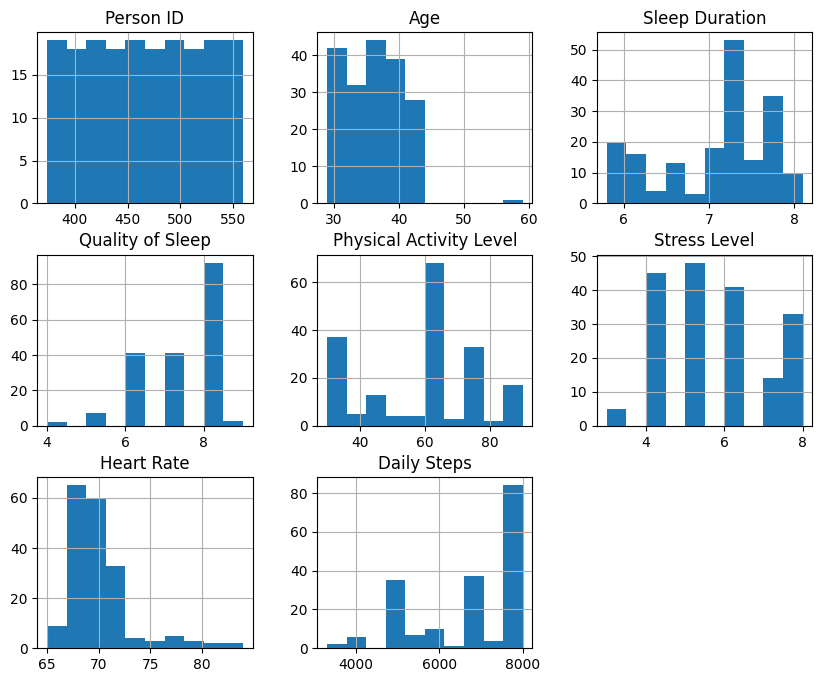

In [72]:
df.hist(figsize=(10, 8))

In [73]:
df.duplicated().sum()

np.int64(0)

In [74]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             156
dtype: int64

In [75]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             156
dtype: int64

In [76]:
df = df.drop(columns=["Sleep Disorder" ])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                186 non-null    int64  
 1   Gender                   186 non-null    object 
 2   Age                      186 non-null    int64  
 3   Occupation               186 non-null    object 
 4   Sleep Duration           186 non-null    float64
 5   Quality of Sleep         186 non-null    int64  
 6   Physical Activity Level  186 non-null    int64  
 7   Stress Level             186 non-null    int64  
 8   BMI Category             186 non-null    object 
 9   Blood Pressure           186 non-null    object 
 10  Heart Rate               186 non-null    int64  
 11  Daily Steps              186 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 17.6+ KB


In [78]:
# Change objects into categorical numbers
from sklearn import preprocessing

# Columns we want to transform
categorical = ["Gender",  "BMI Category"]

label_encoder = preprocessing.LabelEncoder()

for label in categorical:
    df[label] = label_encoder.fit_transform(df[label])

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,374,0,59,Nurse,8.1,9,75,3,3,140/95,68,7000
1,375,1,29,Doctor,7.8,7,75,6,0,120/80,70,8000
2,376,1,29,Doctor,7.8,7,75,6,0,120/80,70,8000
3,377,1,29,Doctor,6.1,6,30,8,0,120/80,70,8000
4,378,1,29,Doctor,7.8,7,75,6,0,120/80,70,8000


In [79]:
# Convert "Blood Pressure Ratio" from string (e.g., "126/82") to numeric
df['Blood Pressure'] = df['Blood Pressure'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Verify the conversion
print(df[['Blood Pressure']].head())

   Blood Pressure
0        1.473684
1        1.500000
2        1.500000
3        1.500000
4        1.500000


In [80]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,374,0,59,Nurse,8.1,9,75,3,3,1.473684,68,7000
1,375,1,29,Doctor,7.8,7,75,6,0,1.500000,70,8000
2,376,1,29,Doctor,7.8,7,75,6,0,1.500000,70,8000
3,377,1,29,Doctor,6.1,6,30,8,0,1.500000,70,8000
4,378,1,29,Doctor,7.8,7,75,6,0,1.500000,70,8000
...,...,...,...,...,...,...,...,...,...,...,...,...
181,555,0,43,Teacher,6.7,7,45,4,3,1.500000,65,6000
182,556,1,43,Salesperson,6.5,6,45,7,3,1.529412,72,6000
183,557,0,43,Teacher,6.7,7,45,4,3,1.500000,65,6000
184,558,1,43,Salesperson,6.4,6,45,7,3,1.529412,72,6000


In [81]:
df['Physical Activity Level'].describe()

count    186.000000
mean      58.016129
std       18.096580
min       30.000000
25%       45.000000
50%       60.000000
75%       75.000000
max       90.000000
Name: Physical Activity Level, dtype: float64

In [82]:
## Normalization of Sleep Duration & Quality of Sleep & Physical Activity Level & Stress Level & Blood Pressure & Heart Rate
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
df[['Physical Activity Level']] = scaler.fit_transform(df[['Physical Activity Level']])
df[['Physical Activity Level']].describe()


,Physical Activity Level
count,186.000000
mean,0.466935
std,0.301610
min,0.000000
25%,0.250000
50%,0.500000
75%,0.750000
max,1.000000


In [83]:


# Assuming 'df' is your dfFrame
numerical_columns = df.select_dtypes(include=['number']).columns

# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outlier_info = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count number of outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        
        outlier_info[col] = {
            "Q1": Q1, "Q3": Q3, "IQR": IQR,
            "Lower Bound": lower_bound, "Upper Bound": upper_bound,
            "Num Outliers": len(outliers),
            "Outliers": outliers.values  # Show outlier values
        }
    
    return outlier_info

# Detect outliers in all numerical columns
outliers = detect_outliers_iqr(df, numerical_columns)

# Display results
for col, info in outliers.items():
    print(f"\n📊 Outlier Analysis for: {col}")
    print(f"Q1: {info['Q1']}, Q3: {info['Q3']}, IQR: {info['IQR']}")
    print(f"Lower Bound: {info['Lower Bound']}, Upper Bound: {info['Upper Bound']}")
    print(f"Number of Outliers: {info['Num Outliers']}")
    print(f"Outliers: {info['Outliers']}\n")



📊 Outlier Analysis for: Person ID
Q1: 420.25, Q3: 512.75, IQR: 92.5
Lower Bound: 281.5, Upper Bound: 651.5
Number of Outliers: 0
Outliers: []


📊 Outlier Analysis for: Gender
Q1: 0.0, Q3: 1.0, IQR: 1.0
Lower Bound: -1.5, Upper Bound: 2.5
Number of Outliers: 0
Outliers: []


📊 Outlier Analysis for: Age
Q1: 32.0, Q3: 39.0, IQR: 7.0
Lower Bound: 21.5, Upper Bound: 49.5
Number of Outliers: 1
Outliers: [59]


📊 Outlier Analysis for: Sleep Duration
Q1: 6.6, Q3: 7.6, IQR: 1.0
Lower Bound: 5.1, Upper Bound: 9.1
Number of Outliers: 0
Outliers: []


📊 Outlier Analysis for: Quality of Sleep
Q1: 6.0, Q3: 8.0, IQR: 2.0
Lower Bound: 3.0, Upper Bound: 11.0
Number of Outliers: 0
Outliers: []


📊 Outlier Analysis for: Physical Activity Level
Q1: 0.25, Q3: 0.75, IQR: 0.5
Lower Bound: -0.5, Upper Bound: 1.5
Number of Outliers: 0
Outliers: []


📊 Outlier Analysis for: Stress Level
Q1: 4.0, Q3: 6.75, IQR: 2.75
Lower Bound: -0.125, Upper Bound: 10.875
Number of Outliers: 0
Outliers: []


📊 Outlier Analysis

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                186 non-null    int64  
 1   Gender                   186 non-null    int64  
 2   Age                      186 non-null    int64  
 3   Occupation               186 non-null    object 
 4   Sleep Duration           186 non-null    float64
 5   Quality of Sleep         186 non-null    int64  
 6   Physical Activity Level  186 non-null    float64
 7   Stress Level             186 non-null    int64  
 8   BMI Category             186 non-null    int64  
 9   Blood Pressure           186 non-null    float64
 10  Heart Rate               186 non-null    int64  
 11  Daily Steps              186 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.6+ KB


In [85]:
df.to_csv('second_clean.csv', index=False)
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,374,0,59,Nurse,8.1,9,0.75,3,3,1.473684,68,7000
1,375,1,29,Doctor,7.8,7,0.75,6,0,1.500000,70,8000
2,376,1,29,Doctor,7.8,7,0.75,6,0,1.500000,70,8000
3,377,1,29,Doctor,6.1,6,0.00,8,0,1.500000,70,8000
4,378,1,29,Doctor,7.8,7,0.75,6,0,1.500000,70,8000
...,...,...,...,...,...,...,...,...,...,...,...,...
181,555,0,43,Teacher,6.7,7,0.25,4,3,1.500000,65,6000
182,556,1,43,Salesperson,6.5,6,0.25,7,3,1.529412,72,6000
183,557,0,43,Teacher,6.7,7,0.25,4,3,1.500000,65,6000
184,558,1,43,Salesperson,6.4,6,0.25,7,3,1.529412,72,6000
